In [ ]:
# グラフで日本語を使うため

!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=5afed9ccee98264a105beeb2ed38c0c336f41f29d385b34c4fb4b17c867f5739
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


In [ ]:
# Mecabインストール

! pip install mecab-python3
! pip install unidic-lite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.8/577.8 KB 9.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658837 sha256=67e5aaafc4620819d6d1e52aa15724336c3d4525c9c6daa79b7d3026e2fdb162
  Stored in directory: /root/.cache/pip/wheels/8c/dd/8f/e21fc192dcd38ae31e1185ce4e66e12df4e811e3d469866e15
Successfully built unidic-lite


In [ ]:
# 形態素解析

import MeCab

fout = open('neko.txt.mecab', 'w')
fin = open('neko.txt', 'r')
tokenizer = MeCab.Tagger()
for line in fin:
    fout.write("".join([token for token in tokenizer.parse(line.strip())]) + "\n")
fin.close()
fout.close()

In [ ]:
#30. 形態素解析結果の読み込み

fin = open('neko.txt.mecab', 'r')
text = fin.readlines()
sentence_list = []
seg_list = []
for line in text:
    if line == '\n':
        continue
    if line == "EOS\n":
        if seg_list != []:
            sentence_list.append(seg_list)
        seg_list = []
    else:
        seg_word = line.split('\t')
        pos = seg_word[4].split('-')
        if len(pos)>1:
            pos1 = pos[1]
        else:
            pos1 = ''
        seg_list.append({'surface':seg_word[0], 'base':seg_word[3], 'pos':pos[0], 'pos1':pos1})
fin.close()

for i in range(5):
    print(sentence_list[i])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'}]
[{'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''}, {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'}, {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'}, {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}]
[{'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生まれる', 'pos': '動詞', 'pos1': '一般'}, {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': ''}, {'surface': 'か', 'base': 'か', 'pos': '助

In [ ]:
#31. 動詞

ans = []
for sentence in sentence_list:
    for morpheme in sentence:
        if morpheme['pos'] == '動詞':
            ans.append(morpheme['surface'])
 
print(ans)

['ある', '生れ', 'つか', 'し', '泣い', 'い', 'し', 'いる', '始め', 'いう', '見', '聞く', 'いう', 'あっ', 'いう', '捕え', '煮', '食う', 'いう', 'ある', 'いう', '思わ', '載せ', '持ち上げ', 'し', 'あっ', 'ある', '落ちつい', '見', 'いう', 'あろう', '思っ', '残っ', 'いる', 'もっ', 'さ', 'し', '逢っ', '出会わし', 'し', 'いる', 'し', '吹く', '咽せ', '弱っ', '飲む', 'いう', 'ある', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'し', '出', 'し', 'いる', '考え出そう', 'し', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', '這い出し', '見る', '棄て', 'ある', '這い出す', 'ある', '坐っ', 'し', '考え', '見', 'いう', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', 'ある', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', 'し', '分ら', 'なる', '減る', '降っ', '来る', 'いう', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', 'ある', '逢っ', 'ある', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', 'し', '出来', '見', '這い上っ', 'する', '投げ出さ', '投げ出さ', '這い上り', '這い上っ', '投げ

In [ ]:
#32. 動詞の基本形

ans = []
for sentence in sentence_list:
    for morpheme in sentence:
        if morpheme['pos'] == '動詞':
            ans.append(morpheme['base'])
 
print(ans)

['有る', '生まれる', '付く', '為る', '泣く', '居る', '為る', '居る', '始める', '言う', '見る', '聞く', '言う', '有る', '言う', '捕らえる', '煮る', '食う', '言う', '有る', '言う', '思う', '乗せる', '持ち上げる', '為る', '有る', '有る', '落ち着く', '見る', '言う', '有る', '思う', '残る', '居る', '持つ', '為る', '為る', '会う', '出会わす', '為る', '居る', '為る', '吹く', '噎せる', '弱る', '飲む', '言う', '有る', '知る', '座る', '居る', '為る', '為る', '始める', '動く', '動く', '分かる', '回る', '成る', '助かる', '思う', '居る', '為る', '出る', '為る', '居る', '考え出す', '為る', '分かる', '付く', '見る', '居る', '居る', '見える', '隠す', '仕舞う', '違う', '明く', '居る', '這い出す', '見る', '捨てる', '有る', '這い出す', '有る', '座る', '為る', '考える', '見る', '言う', '出る', '為る', '泣く', '来る', '呉れる', '考え付く', '遣る', '見る', '来る', '渡る', '掛かる', '減る', '来る', '泣く', '出る', '有る', '有る', '為る', '巡る', '始める', '為る', '這う', '行く', '出る', '入る', '成る', '思う', '崩れる', '潜り込む', '破れる', '居る', '為る', '知れる', '有る', '言う', '至る', '為る', '成る', '居る', '忍び込む', '為る', '分かる', '成る', '減る', '降る', '来る', '言う', '出来る', '成る', '歩く', '行く', '考える', '入る', '居る', '見る', '為る', '有る', '会う', '有る', '見る', '掴む', '放り出す', '思う', '舐る', '任せる', '居る', '為る', '出来る', '見る'

In [ ]:
#33. 「AのB」

ans = []
for sentence in sentence_list:
    for idx in range(1, len(sentence)-1):
        if sentence[idx-1]['pos'] == '名詞' and sentence[idx]['surface'] == 'の' and sentence[idx+1]['pos'] == '名詞':
            ans.append(sentence[idx-1]['surface'] + sentence[idx]['surface'] + sentence[idx+1]['surface'])

print(ans)

['掌の上', '書生の顔', 'ものの見', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', 'なしの小猫', '鼻の下', '自分の住家', '家のもの', 'うちのもの', '本の上', '皮膚の色', '本の上', '以外のもの', '主人の傍', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'うちの小供', '小供の寝床', '小供の一人', '例の神経', '次の部屋', '自分の勝手', 'へっついの中', '台所の板の間', '家の書生', '裏の池', '親子の愛', '隣りの三毛', '目刺の頭', '鰡の臍', '軍人の家', '代言の主人', '教師の家', '猫の時節', '家の主人', '胃弱の癖', '後架の中', '平の宗盛', '月の月給', '主人の述懐', '金縁の眼鏡', '主人の顔', '訳のもの', '利の大家', '金縁の裏', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '人の気', '自己の力量', '人間の不徳', '家の裏', 'うちの小供', '日の二', '茶の木', '木の根', '西側の杉垣', '杉垣のそば', '他の庭内', '皮膚の上', '柔毛の間', '嘆賞の念', '好奇の心', '小春の風', '杉垣の上', '梧桐の枝', '菊の茂み', '真丸の眼', '人間の珍重', '双眸の奥', '額の上', '声の底', '教師の家', '良家の猫', '車屋の黒', '車屋の黒', '主義の的', '軽侮の念', '左の問答', '車屋の方', 'うちの主人', '車屋の猫', '教師の方', '腹の足し', '車屋の黒', '相当の気焔', '畠の中', '黒の比較', '鼻の先', '自分の手柄', '墻壁の欠', '鼠の百', '掃除の時', 'うち

In [ ]:
#34. 名詞の連接

ans = []
for sentence in sentence_list:
    nouns = []
    for morpheme in sentence:
        if morpheme['pos'] == '名詞':
            nouns.append(morpheme['surface'])
        else:
            if len(nouns)>1:
                ans.append(''.join(nouns))
            nouns = []

print(ans)  

['見始', '時妙', '一毛', '後猫', '一度', '上今', 'うち池', '書生以外', '間おさん', '宿なし', 'まま奥', '終日書斎', 'ぎりほとんど', '時々忍び足', '二三ページ', '主人以外', '朝主人', '椽側', '一間', '神経胃弱', '時々同衾', '言語同断', '家内総がかり', '先日玉', '一部始終', '新体詩', '後架先生', 'そら宗盛', '一月', '月給日', '水彩絵具', '毎日毎日書斎', '自ら筆', '眼鏡越', '大家アンドレア', '星辰あり', '禽あり', '獣あり', '金魚あり', '鴉あり', '椽側', '一分', '上不思議', '盲猫', 'いくらアンドレア', '一分', 'あと大', '馬鹿野郎', '馬鹿野郎', '馬鹿野郎呼わり', '馬鹿野郎', 'みんな増長', '数倍', '十坪', '腹加減', '二時頃', '運動かたがた', '前後不覚', '二三', '少々言葉', '乱暴猫', '同盟敬遠主義', '少々軽侮', '茶畠', '車屋相当', '不徳事件', '日例', '茶畠', '自慢話し', '手柄話', '年が年', '得意気', '一度いたち', '最後っ屁', '二三', '百年', '五銭', '壱円五十銭', '少々気味', '鼠以外', '水彩画', '十二月一日', '水彩画', '水彩画家', '水彩画', '通人論', '水彩画', '主人はかく', '中二', '十二月四', '水彩画', '通り下手', '水彩画', '水彩画家', '所謂通人', '水彩画', '翌日例', '金縁眼鏡', '結果今日', '椽側', 'サルト事件', '時々冗談', '仏国革命', '日本文学会', '演説会', '百名', '歴史小説セオファーノ', '歴史小説', '女主人', '神経胃弱', '模様画', '実際奇警', '半分降参', '後跛', '最後屁', '天秤棒', '二三段', '三間半', '椽側', '毎日学校', '水彩画', '元朝早々主人', '絵端書', '交友某画家', '一応感服', '三世相', '絵端書', '絵端書', '一列一体', '自家固有', '張り具合', '垂れ加減', 

In [ ]:
#35. 単語の出現頻度

from collections import Counter

#表層系を抽出
words = []
for sentence in sentence_list:
    for morpheme in sentence:
        words.append(morpheme['surface'])

#上位10単語を出力
words_cnt = Counter(words)
words_cnt_sort = words_cnt.most_common()
for i in range(10):
    print(words_cnt_sort[i])

('の', 9541)
('。', 7486)
('て', 7418)
('に', 7060)
('、', 6773)
('は', 6501)
('と', 6156)
('を', 6119)
('が', 5394)
('で', 4543)


<BarContainer object of 10 artists>

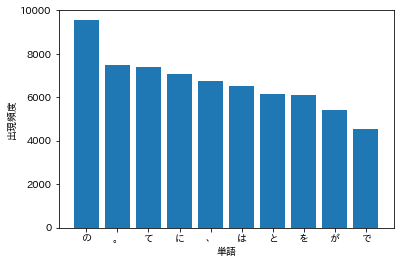

In [ ]:
#36. 頻度上位10語

from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

#表層系を抽出
words = []
for sentence in sentence_list:
    for morpheme in sentence:
        words.append(morpheme['surface'])

#単語の集計＋ソート
words_cnt = Counter(words)
words_cnt_sort = words_cnt.most_common()

#上位10単語をプロット
values = [word[0] for word in words_cnt_sort[:10]]
counts = [word[1] for word in words_cnt_sort[:10]]

plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.bar(values, counts)

<BarContainer object of 10 artists>

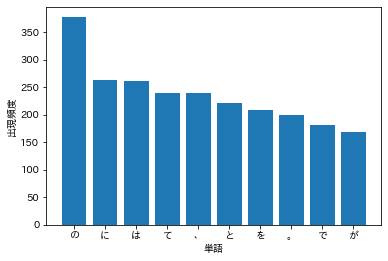

In [ ]:
#37. 「猫」と共起頻度の高い上位10語

from collections import Counter

#文に猫があるとき、その他の単語を加える。
words = []
for sentence in sentence_list:
    tmp = []
    for morpheme in sentence:
        tmp.append(morpheme["surface"])
    if "猫" in tmp:
        words += tmp

#単語の集計＋並び替え（猫は削除）
words_cnt = Counter(words)
del words_cnt['猫']
words_cnt_sort = words_cnt.most_common()

#上位10単語をプロット
values = [word[0] for word in words_cnt_sort[:10]]
counts = [word[1] for word in words_cnt_sort[:10]]

plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.bar(values, counts)

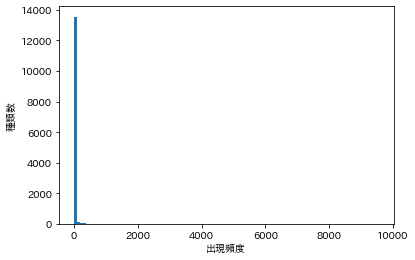

In [ ]:
#38. ヒストグラム

from collections import Counter
import matplotlib.pyplot as plt

#表層系を抽出
words = []
for sentence in sentence_list:
    for morpheme in sentence:
        words.append(morpheme['surface'])

#単語の集計
words_cnt = Counter(words)

plt.xlabel('出現頻度')
plt.ylabel('種類数')
plt.hist(words_cnt.values(), bins=100)
plt.show()

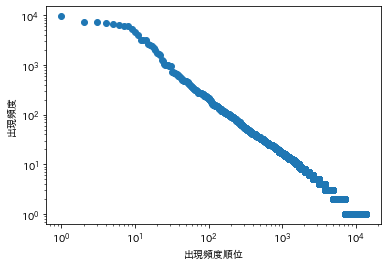

In [ ]:
#39. Zipfの法則

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

#表層系を抽出
words = []
for sentence in sentence_list:
    for morpheme in sentence:
        words.append(morpheme['surface'])

#単語の集計＋並び替え
words_cnt = Counter(words)
words_cnt_sort = words_cnt.most_common()

values = [word[1] for word in words_cnt_sort]
plt.scatter(range(1, len(values)+1), values)
#ログスケールにする
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()